In [1]:
import numpy as np

class KDTreeNode:
    def __init__(self, points, left=None, right=None):
        self.points = points
        self.mean = np.mean([point[0] for point in points], axis=0)
        self.label = points[0][1]  # Assuming all points in the node have the same label
        self.left = left
        self.right = right

def build_kd_tree(points, leaf_size):
    # print(points)
    if len(points) <= leaf_size:
        return KDTreeNode(points)
    
    # Choose axis with maximum variance
    axis = np.argmax(np.var([point[0] for point in points], axis=0))
    
    # Sort points along the selected axis
    points_sorted = sorted(points, key=lambda x: x[0][axis])
    median_idx = len(points_sorted) // 2
    
    # Recursively build left an d right subtrees
    left_child = build_kd_tree(points_sorted[:median_idx], leaf_size)
    right_child = build_kd_tree(points_sorted[median_idx:], leaf_size)
    
    return KDTreeNode(points, left_child, right_child)

In [25]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic classification dataset
X_vis, y_vis = make_classification(n_samples=5000, n_features=20, n_informative=10,
                           n_classes=5, random_state=42)

# Split dataset into training and testing sets
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

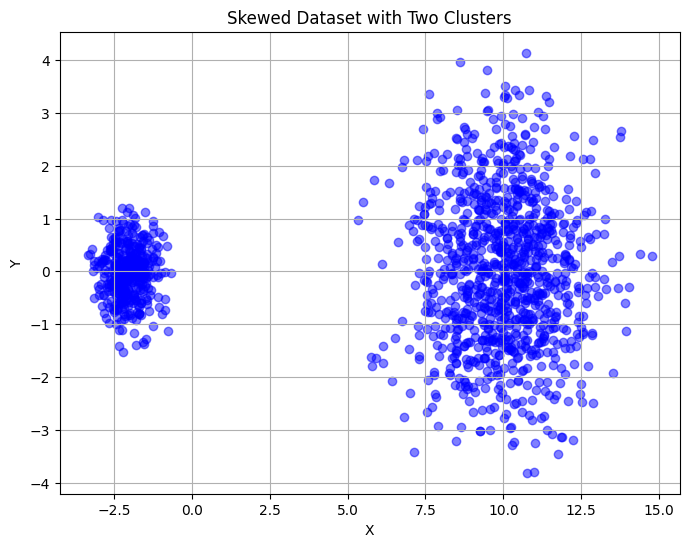

In [26]:
from sklearn.datasets import make_blobs

np.random.seed(0)

# Parameters for the skewed dataset
centers = [[-2, 0], [10, 0]]
cluster_std = [0.5, 1.5]
num_samples = [400, 1000]  # Number of samples in each cluster

# Generate the skewed dataset using make_blobs
X_skewed, y_skew = make_blobs(n_samples=num_samples, centers=centers, cluster_std=cluster_std, random_state=0)

# Visualize the skewed dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_skewed[:, 0], X_skewed[:, 1], c='b', alpha=0.5)
plt.title('Skewed Dataset with Two Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [37]:
print(X_skewed.shape, y_skew.shape)

(1400, 2) (1400,)


In [29]:
# Build KD tree using training data
root_node = build_kd_tree(list(zip(X_skewed, y_skew)), leaf_size=15)

# Extract coreset means and labels from leaf nodes
def get_leaf_nodes(kd_node, leaf_nodes):
    if kd_node is None:
        return
    
    if kd_node.left is None and kd_node.right is None:
        leaf_nodes.append(kd_node)
        return
    
    get_leaf_nodes(kd_node.left, leaf_nodes)
    get_leaf_nodes(kd_node.right, leaf_nodes)

leaf_nodes = []
get_leaf_nodes(root_node, leaf_nodes)

coreset_means = [node.mean for node in leaf_nodes]
coreset_labels = [node.label for node in leaf_nodes]

In [30]:
print(len(coreset_means))

128


In [31]:
coreset_means = np.array(coreset_means)

In [32]:
print(coreset_means)

[[-2.4437611  -1.06056331]
 [-2.47733742 -0.69400981]
 [-2.69121569 -0.47112748]
 [-2.27914246 -0.46403872]
 [-2.77549732 -0.2015433 ]
 [-2.49795045 -0.18576601]
 [-2.27939751 -0.23543616]
 [-2.3083212  -0.0985187 ]
 [-1.8560358  -1.02482414]
 [-1.88908209 -0.72977009]
 [-2.07996748 -0.49437673]
 [-1.75250669 -0.50008299]
 [-2.02249324 -0.25321923]
 [-2.04903603 -0.09523383]
 [-1.65453253 -0.24920518]
 [-1.64597022 -0.07356674]
 [-3.04676772  0.15395172]
 [-2.63911907  0.14033736]
 [-2.81470023  0.56792842]
 [-2.52835128  0.52524542]
 [-2.33984559  0.14213082]
 [-2.1880069   0.1020086 ]
 [-2.27245491  0.47421639]
 [-2.28684534  0.8854525 ]
 [-2.03027678  0.12746623]
 [-1.89193003  0.16476646]
 [-1.72249986  0.11794131]
 [-1.57842126  0.09498923]
 [-1.9375029   0.37391455]
 [-1.67123523  0.40153634]
 [-1.85249913  0.60821313]
 [-1.84292936  0.9204747 ]
 [-1.28271255 -0.71327361]
 [-1.30199193 -0.13451621]
 [-1.28636368  0.1895255 ]
 [-1.23851789  0.61740293]
 [ 1.51526059 -0.21973918]
 

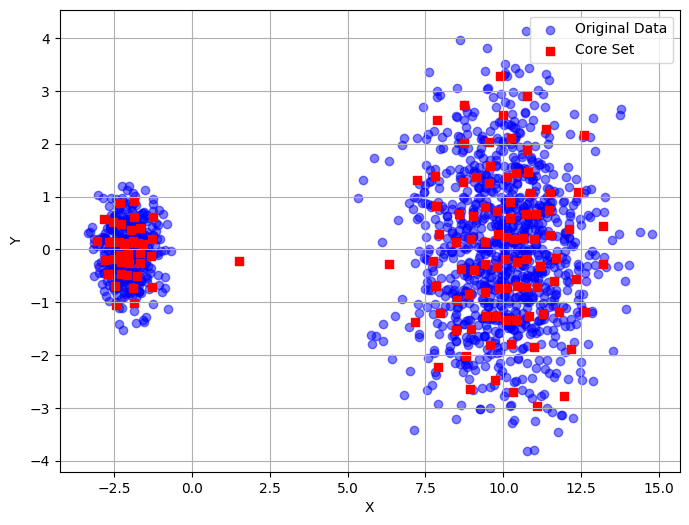

Shape of core-set: (128, 2)


In [36]:
core_set_size = 50

# Apply the greedy core-set selection algorithm to the skewed dataset

# Visualize the core-set along with the original skewed dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_skewed[:, 0], X_skewed[:, 1], c='b', alpha=0.5, label='Original Data')
plt.scatter(coreset_means[:, 0], coreset_means[:, 1], c='r', marker='s', s=40, label='Core Set')
# plt.title('Greedy Core-Set Selection on Skewed Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

print("Shape of core-set:", coreset_means.shape)

In [11]:
print(len(coreset_means))

512


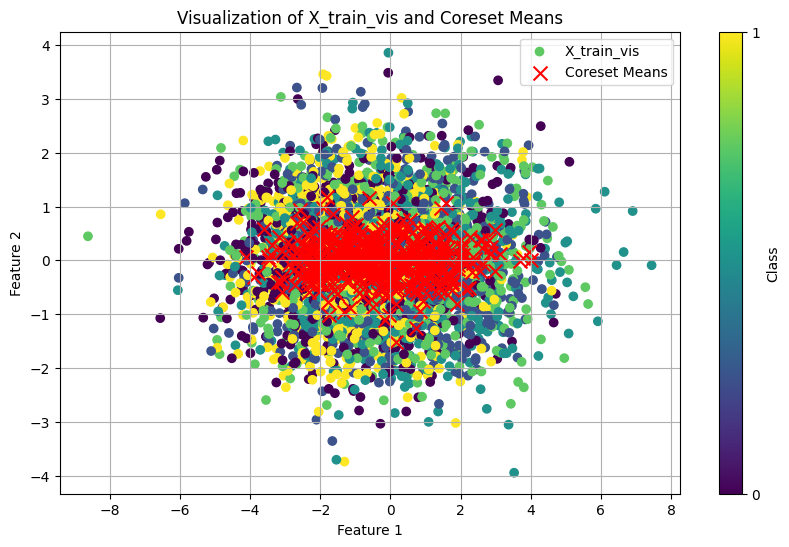

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot X_train_vis
plt.figure(figsize=(10, 6))
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, cmap='viridis', label='X_train_vis')

# Scatter plot coreset_means
coreset_means = np.array(coreset_means)  # Convert to numpy array for easier indexing
plt.scatter(coreset_means[:, 0], coreset_means[:, 1], c='red', marker='x', s=100, label='Coreset Means')

plt.title('Visualization of X_train_vis and Coreset Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class', ticks=range(5))  # Color bar for X_train_vis classes
plt.legend()
plt.grid(True)
plt.show()

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic classification dataset
X, y = make_classification(n_samples=100000, n_features=20, n_informative=10,
                           n_classes=5, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Build KD tree using training data
def get_coreset(k):
    root_node = build_kd_tree(list(zip(X_train, y_train)), leaf_size=k)

    # Extract coreset means and labels from leaf nodes"
    def get_leaf_nodes(kd_node, leaf_nodes):
        if kd_node is None:
            return
        
        if kd_node.left is None and kd_node.right is None:
            leaf_nodes.append(kd_node)
            return
        
        get_leaf_nodes(kd_node.left, leaf_nodes)
        get_leaf_nodes(kd_node.right, leaf_nodes)

    leaf_nodes = []
    get_leaf_nodes(root_node, leaf_nodes)

    coreset_means = [node.mean for node in leaf_nodes]
    coreset_labels = [node.label for node in leaf_nodes]
    return coreset_means, coreset_labels

In [4]:
print(len(get_coreset(100)))

2


In [41]:
print(len(coreset_means))

8192


In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# MLP with full dataset
mlp_full = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp_full.fit(X_train, y_train)

# MLP with coreset
# mlp_coreset = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
# mlp_coreset.fit(coreset_means, coreset_labels)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

In [12]:
# Evaluate MLP with full dataset
y_pred_full = mlp_full.predict(X_train)
accuracy_full = accuracy_score(y_train, y_pred_full)
print(f"Accuracy of MLP with full dataset: {accuracy_full:.4f}")

Accuracy of MLP with full dataset: 0.9746


In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def train_and_test_coreset(k):
    coreset_means, coreset_labels = get_coreset(k)
    
    # Train MLP with coreset
    mlp_coreset = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
    mlp_coreset.fit(coreset_means, coreset_labels)
    
    # Evaluate MLP with coreset
    y_pred_coreset = mlp_coreset.predict(X_test)
    acc_coreset = accuracy_score(y_test, y_pred_coreset)
    
    return acc_coreset, len(coreset_means)

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def train_and_test_random(k):
    # coreset_means, coreset_labels = get_coreset(k)
    random_4096_points_indices = np.random.choice(len(X_train), k, replace=False)
    random_points = X_train[random_4096_points_indices]
    random_labels = y_train[random_4096_points_indices]
    
    # Train MLP with coreset
    mlp_coreset = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
    mlp_coreset.fit(random_points, random_labels)
    
    # Evaluate MLP with coreset
    y_pred_coreset = mlp_coreset.predict(X_test)
    acc_coreset = accuracy_score(y_test, y_pred_coreset)
    
    return acc_coreset, len(random_points)

In [7]:

coreset_accuracies = []
lis = []
for k in range(100, 0, -5):
    print(k)
    acc_coreset, l = train_and_test_coreset(k)
    if l not in lis:
        coreset_accuracies.append(acc_coreset)
        coreset_accuracies.append(acc_coreset)
        lis.append(l)
        print(f"Coreset size: {l}, Accuracy: {acc_coreset}")

100


C:\Users\AYUSH MODI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Coreset size: 1024, Accuracy: 0.3782
95


C:\Users\AYUSH MODI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


90


C:\Users\AYUSH MODI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


85


C:\Users\AYUSH MODI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


80


C:\Users\AYUSH MODI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


75


C:\Users\AYUSH MODI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Coreset size: 2048, Accuracy: 0.39915
70


C:\Users\AYUSH MODI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


65


C:\Users\AYUSH MODI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


60


C:\Users\AYUSH MODI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


55


C:\Users\AYUSH MODI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


50


C:\Users\AYUSH MODI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


45


C:\Users\AYUSH MODI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


40


C:\Users\AYUSH MODI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


35
Coreset size: 4096, Accuracy: 0.46785
30
25
20
15
Coreset size: 8192, Accuracy: 0.6587
10
5
Coreset size: 16384, Accuracy: 0.7746


In [14]:
print(len(coreset_accuracies))

10


In [11]:
ran = [1024, 2048, 4096, 8192, 16384]
random_accuracies = []
lis = []
for k in ran:
    print(k)
    acc_random, l = train_and_test_random(k)
    if l not in lis:
        random_accuracies.append(acc_random)
        random_accuracies.append(acc_random)
        lis.append(l)
        print(f"Random size: {l}, Accuracy: {acc_random}")

1024
Random size: 1024, Accuracy: 0.7525
2048
Random size: 2048, Accuracy: 0.80315
4096
Random size: 4096, Accuracy: 0.84035
8192
Random size: 8192, Accuracy: 0.8767
16384
Random size: 16384, Accuracy: 0.90355


In [15]:
coreset_accuracies = list(set(coreset_accuracies))

# Remove duplicates from random_accuracies using set
random_accuracies = list(set(random_accuracies))


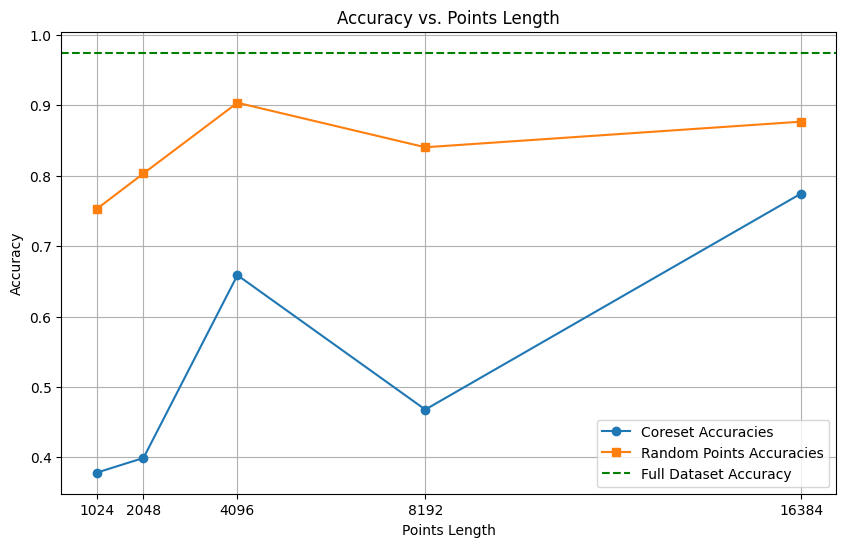

In [17]:
import matplotlib.pyplot as plt

# Data for coreset and random points accuracies
points_lengths = [1024, 2048, 4096, 8192, 16384]
# coreset_accuracies = [0.92, 0.93, 0.94, 0.95, 0.96]  # Example coreset accuracies for each length
# random_accuracies = [0.88, 0.89, 0.90, 0.91, 0.92]   # Example random points accuracies for each length

# Third graph - constant accuracy line for full dataset
full_dataset_accuracy = 0.9746

plt.figure(figsize=(10, 6))

# Plot coreset and random points accuracies
plt.plot(points_lengths, coreset_accuracies, marker='o', label='Coreset Accuracies')
plt.plot(points_lengths, random_accuracies, marker='s', label='Random Points Accuracies')

# Plot constant line for full dataset accuracy
plt.axhline(y=full_dataset_accuracy, color='g', linestyle='--', label='Full Dataset Accuracy')

# Configure plot
plt.title('Accuracy vs. Points Length')
plt.xlabel('Points Length')
plt.ylabel('Accuracy')
plt.xticks(points_lengths)  # Set x-axis ticks to specified points lengths
plt.legend()
plt.grid(True)
plt.show()


In [64]:
mlp_coreset_new = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp_coreset_new.fit(coreset_means, coreset_labels)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

In [57]:
# Evaluate MLP with full dataset
y_pred_full = mlp_full.predict(X_train)
accuracy_full = accuracy_score(y_train, y_pred_full)
print(f"Accuracy of MLP with full dataset: {accuracy_full:.4f}")

# Evaluate MLP with coreset
y_pred_coreset = mlp_coreset.predict(coreset_means)
accuracy_coreset = accuracy_score(coreset_labels, y_pred_coreset)
print(f"Accuracy of MLP with coreset: {accuracy_coreset:.4f}")

Accuracy of MLP with full dataset: 0.9746
Accuracy of MLP with coreset: 0.8960


In [65]:
y_pred_coreset_new = mlp_coreset_new.predict(coreset_means)
accuracy_coreset_new = accuracy_score(coreset_labels, y_pred_coreset_new)
print(f"Accuracy of MLP with coreset: {accuracy_coreset_new:.4f}")

Accuracy of MLP with coreset: 0.8412


In [58]:
# Evaluate MLP with full dataset
y_pred_full = mlp_full.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)
print(f"Accuracy of MLP with full dataset: {accuracy_full:.4f}")

# Evaluate MLP with coreset
y_pred_coreset = mlp_coreset.predict(X_test)
accuracy_coreset = accuracy_score(y_test, y_pred_coreset)
print(f"Accuracy of MLP with coreset: {accuracy_coreset:.4f}")

Accuracy of MLP with full dataset: 0.9628
Accuracy of MLP with coreset: 0.9319


In [66]:
y_pred_coreset_new_test = mlp_coreset_new.predict(X_test)
accuracy_coreset = accuracy_score(y_test, y_pred_coreset_new_test)
print(f"Accuracy of MLP with coreset: {accuracy_coreset:.4f}")

Accuracy of MLP with coreset: 0.6587


In [59]:
random_4096_points_indices = np.random.choice(len(X_train), len(coreset_means), replace=False)
random_points = X_train[random_4096_points_indices]
random_labels = y_train[random_4096_points_indices]

In [69]:
random_8k_points_indices = np.random.choice(len(X_train), len(coreset_means), replace=False)
random_points_new = X_train[random_8k_points_indices]
random_labels_new = y_train[random_8k_points_indices]

In [60]:
# MLP with coreset
mlp_random = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp_random.fit(random_points, random_labels)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

In [70]:
# MLP with coreset
mlp_random_new = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp_random_new.fit(random_points_new, random_labels_new)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

In [61]:
y_pred_random = mlp_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f"Accuracy of MLP with random: {accuracy_random:.4f}")

Accuracy of MLP with random: 0.9540


In [71]:
y_pred_random_new = mlp_random_new.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random_new)
print(f"Accuracy of MLP with random: {accuracy_random:.4f}")

Accuracy of MLP with random: 0.8803
